In [2]:
%load_ext autoreload
%autoreload 2

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from wittgenstein import RIPPER

from utils.constants import STAGE_DIR, ANALYSIS_DIR
from utils.dataload import load_data
from utils.display import cdisplay
from utils.functions import split_train_test, tree_structure
from utils.plots import decision_boundary_plot
from utils.transformers import SequentialFeatureSelectorTransformer

# Load data

In [4]:
# Load all dataset
X_all = load_data(
    STAGE_DIR / 'preprocess' / 'X_train.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using univariate analysis
X_mi = load_data(
    STAGE_DIR / 'selection' / 'X_train_mi.parquet',
    load_func=pd.read_parquet).sort_index()

X_x2 = load_data(
    STAGE_DIR / 'selection' / 'X_train_x2.parquet',
    load_func=pd.read_parquet).sort_index()

X_anova = load_data(
    STAGE_DIR / 'selection' / 'X_train_anova.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using multivariate analysis
X_relief = load_data(
    STAGE_DIR / 'selection' / 'X_train_relief.parquet',
    load_func=pd.read_parquet).sort_index()

In [5]:
y = load_data(
    STAGE_DIR / 'preprocess' / 'y.parquet',
    load_func=pd.read_parquet).sort_index()

In [6]:
X_train_all, X_test_all, y_train_all, y_test_all = split_train_test(X_all, y)
X_train_mi, X_test_mi, y_train_mi, y_test_mi = split_train_test(X_mi, y)
X_train_x2, X_test_x2, y_train_x2, y_test_x2 = split_train_test(X_x2, y)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = split_train_test(X_anova, y)
X_train_relief, X_test_relief, y_train_relief, y_test_relief = split_train_test(X_relief, y)

# Support Vector Machine

The training occurs in a SVM model with polynomial kernel. The in-sample scores are calculated using a cross validation method with 5 validation steps. The accuracy is used as the metric to evaluate the model performance.

## All features

### Training and score in the sample (80% - 0.01 std)

In [7]:
svm_all = SVC(kernel='poly')
svm_all_scores = cross_val_score(
    svm_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_all_scores.mean(),
    svm_all_scores.std())
)

0.81 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [8]:
svm_all = SVC(kernel='poly').fit(X_train_all, y_train_all['y'])
y_test_predict_all = svm_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       569
           1       0.62      0.29      0.39       178

    accuracy                           0.79       747
   macro avg       0.72      0.62      0.63       747
weighted avg       0.76      0.79      0.76       747



### Decision boundary

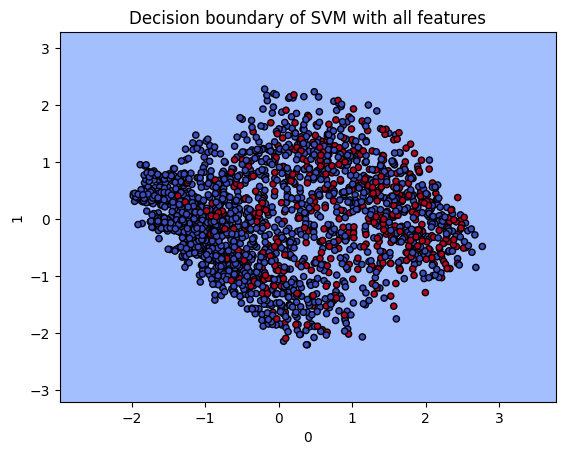

In [9]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_all, y_train_all,
    'SVM with all features'
)

## Univariate - Mutual Information

### Training and score in the sample (80% - 0.01 std)

In [10]:
svm_mi = SVC(kernel='poly')
svm_mi_scores = cross_val_score(
    svm_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_mi_scores.mean(),
    svm_mi_scores.std())
)

0.79 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [11]:
svm_mi = SVC(kernel='poly').fit(X_train_mi, y_train_mi['y'])
y_test_predict_mi = svm_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_mi))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       594
           1       0.55      0.31      0.40       153

    accuracy                           0.81       747
   macro avg       0.70      0.62      0.64       747
weighted avg       0.78      0.81      0.79       747



### Decision boundary

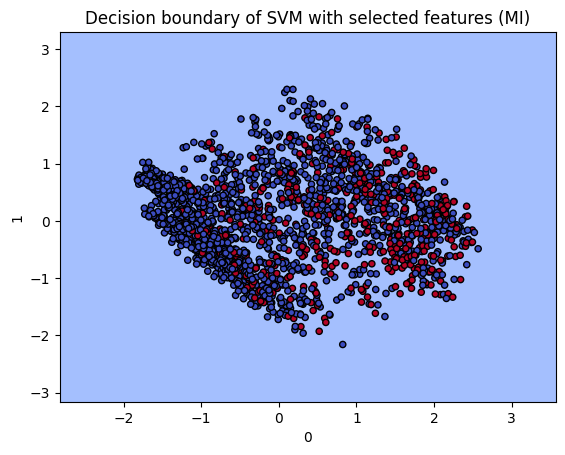

In [12]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_mi, y_train_mi,
    'SVM with selected features (MI)'
)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [13]:
svm_x2 = SVC(kernel='poly')
svm_x2_scores = cross_val_score(
    svm_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_x2_scores.mean(),
    svm_x2_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [14]:
svm_x2 = SVC(kernel='poly').fit(X_train_x2, y_train_x2['y'])
y_test_predict_x2 = svm_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_x2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       581
           1       0.51      0.20      0.29       166

    accuracy                           0.78       747
   macro avg       0.66      0.57      0.58       747
weighted avg       0.74      0.78      0.74       747



### Decision boundary

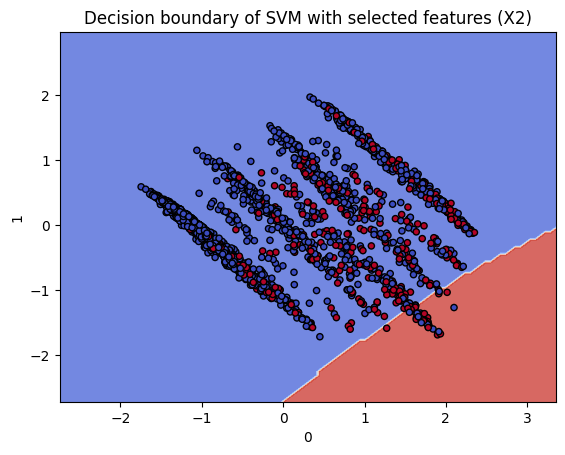

In [15]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_x2, y_train_x2,
    'SVM with selected features (X2)'
)

## Univariate - ANOVA

### Training and score in the sample (80% - 0.02 std)

In [16]:
svm_anova = SVC(kernel='poly')
svm_anova_scores = cross_val_score(
    svm_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_anova_scores.mean(),
    svm_anova_scores.std())
)

0.80 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [17]:
svm_anova = SVC(kernel='poly').fit(X_train_anova, y_train_anova['y'])
y_test_predict_anova = svm_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_anova))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       570
           1       0.60      0.29      0.39       177

    accuracy                           0.79       747
   macro avg       0.70      0.62      0.63       747
weighted avg       0.76      0.79      0.76       747



### Decision boundary

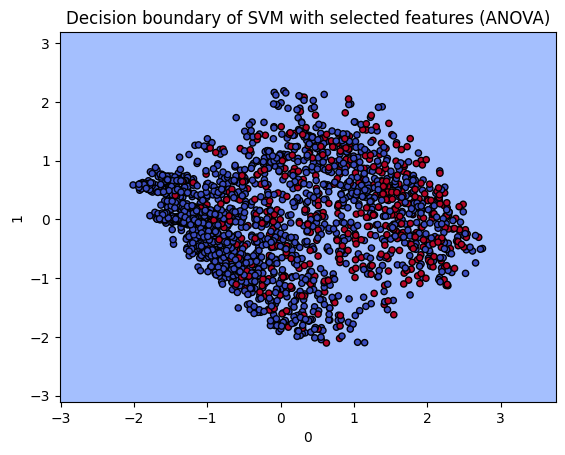

In [18]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_anova, y_train_anova,
    'SVM with selected features (ANOVA)'
)

## Multivariate - Relief

### Training and score in the sample (78% - 0.1 std)

In [19]:
svm_relief = SVC(kernel='poly')
svm_relief_scores = cross_val_score(
    svm_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_relief_scores.mean(),
    svm_relief_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [20]:
svm_relief = SVC(kernel='poly').fit(X_train_relief, y_train_relief['y'])
y_test_predict_relief = svm_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_relief))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       596
           1       0.53      0.26      0.35       151

    accuracy                           0.80       747
   macro avg       0.68      0.60      0.62       747
weighted avg       0.77      0.80      0.78       747



### Decision boundary

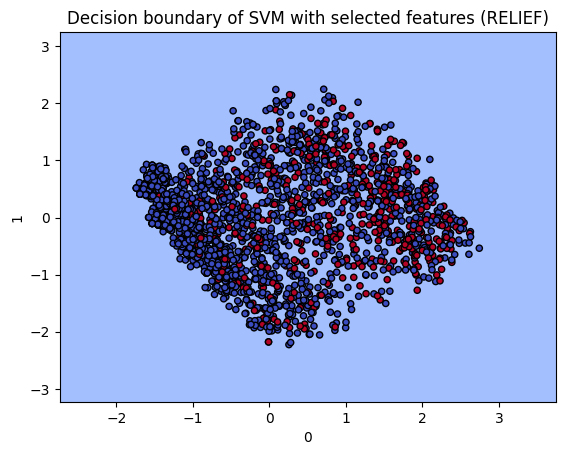

In [21]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_relief, y_train_relief,
    'SVM with selected features (RELIEF)'
)

## Wrapper

### Select features

In [22]:
svm_wrapper = SVC(kernel='poly')

svm_fs_wrapper = SequentialFeatureSelectorTransformer(
    svm_wrapper, n_features_to_select=75)

print('Fitting model. This may take a while...')
X_wrapper = svm_fs_wrapper.fit_transform(X_all, y['y'])
print('We have a winner!')

X_train_wrapper, X_test_wrapper, y_train_wrapper, y_test_wrapper = split_train_test(X_wrapper, y)

Fitting model. This may take a while...
We have a winner!


In [24]:
X_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')

### Training and score in the sample (80% - 0.1 std)

In [25]:
svm_wrapper_scores = cross_val_score(
    svm_wrapper,
    X_train_wrapper,
    y_train_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_wrapper_scores.mean(),
    svm_wrapper_scores.std())
)

0.80 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [26]:
svm_wrapper = SVC(kernel='poly').fit(X_train_wrapper, y_train_wrapper['y'])
y_test_predict_wrapper = svm_wrapper.predict(X_test_wrapper)

print(classification_report(y_test_wrapper['y'], y_test_predict_wrapper))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       577
           1       0.68      0.27      0.39       170

    accuracy                           0.80       747
   macro avg       0.75      0.62      0.64       747
weighted avg       0.79      0.80      0.77       747



### Decision boundary

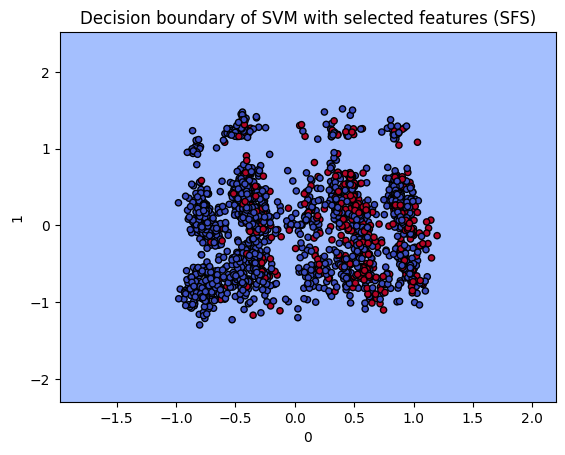

In [27]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_wrapper, y_train_wrapper,
    'SVM with selected features (SFS)'
)

# Classification Tree

We use a Decision Tree model with entropy criterion and 10 levels of depth. The in-sample scores are calculated using a cross validation method with 5 folds. The accuracy is used as the metric to evaluate the model performance.

In [54]:
tree_parameters = {
    'criterion': 'entropy',
    'max_depth': 5
}

## All features

### Training and score in the sample (78% - 0.00 std)

In [55]:
tree_all = DecisionTreeClassifier(**tree_parameters)
tree_all_scores = cross_val_score(
    tree_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_all_scores.mean(),
    tree_all_scores.std())
)

0.78 accuracy with a standard deviation of 0.00


### Out-of-sample score

In [65]:
tree_all = DecisionTreeClassifier(**tree_parameters).fit(X_train_all, y_train_all['y'])
y_test_predict_tree_all = tree_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_tree_all))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       569
           1       0.47      0.37      0.42       178

    accuracy                           0.75       747
   macro avg       0.65      0.62      0.63       747
weighted avg       0.73      0.75      0.74       747



### Tree structure

In [73]:
tree_structure(tree_all, X_train_all.columns.values)

The binary tree structure has 53 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, scholarship_years_sqd_mean] <= 0.1399281993508339 else to node 32.
	node=1 is a split node: go to node 2 if X[:, age_mean] <= 0.15806451439857483 else to node 17.
		node=2 is a split node: go to node 3 if X[:, kinship_children_sum] <= 0.2500000074505806 else to node 10.
			node=3 is a split node: go to node 4 if X[:, scholarship_years_sqd_mean] <= 0.08571428433060646 else to node 7.
				node=4 is a split node: go to node 5 if X[:, tenenment_size] <= 0.321428582072258 else to node 6.
					node=5 is a leaf node.
					node=6 is a leaf node.
				node=7 is a split node: go to node 8 if X[:, state_floor_bad] <= 0.5 else to node 9.
					node=8 is a leaf node.
					node=9 is a leaf node.
			node=10 is a split node: go to node 11 if X[:, dependency_rate] <= 0.1770833358168602 else to node 14.
				node=11 is a split node: go to node 12 if X[:, education_years_mean_18+] <= 0.

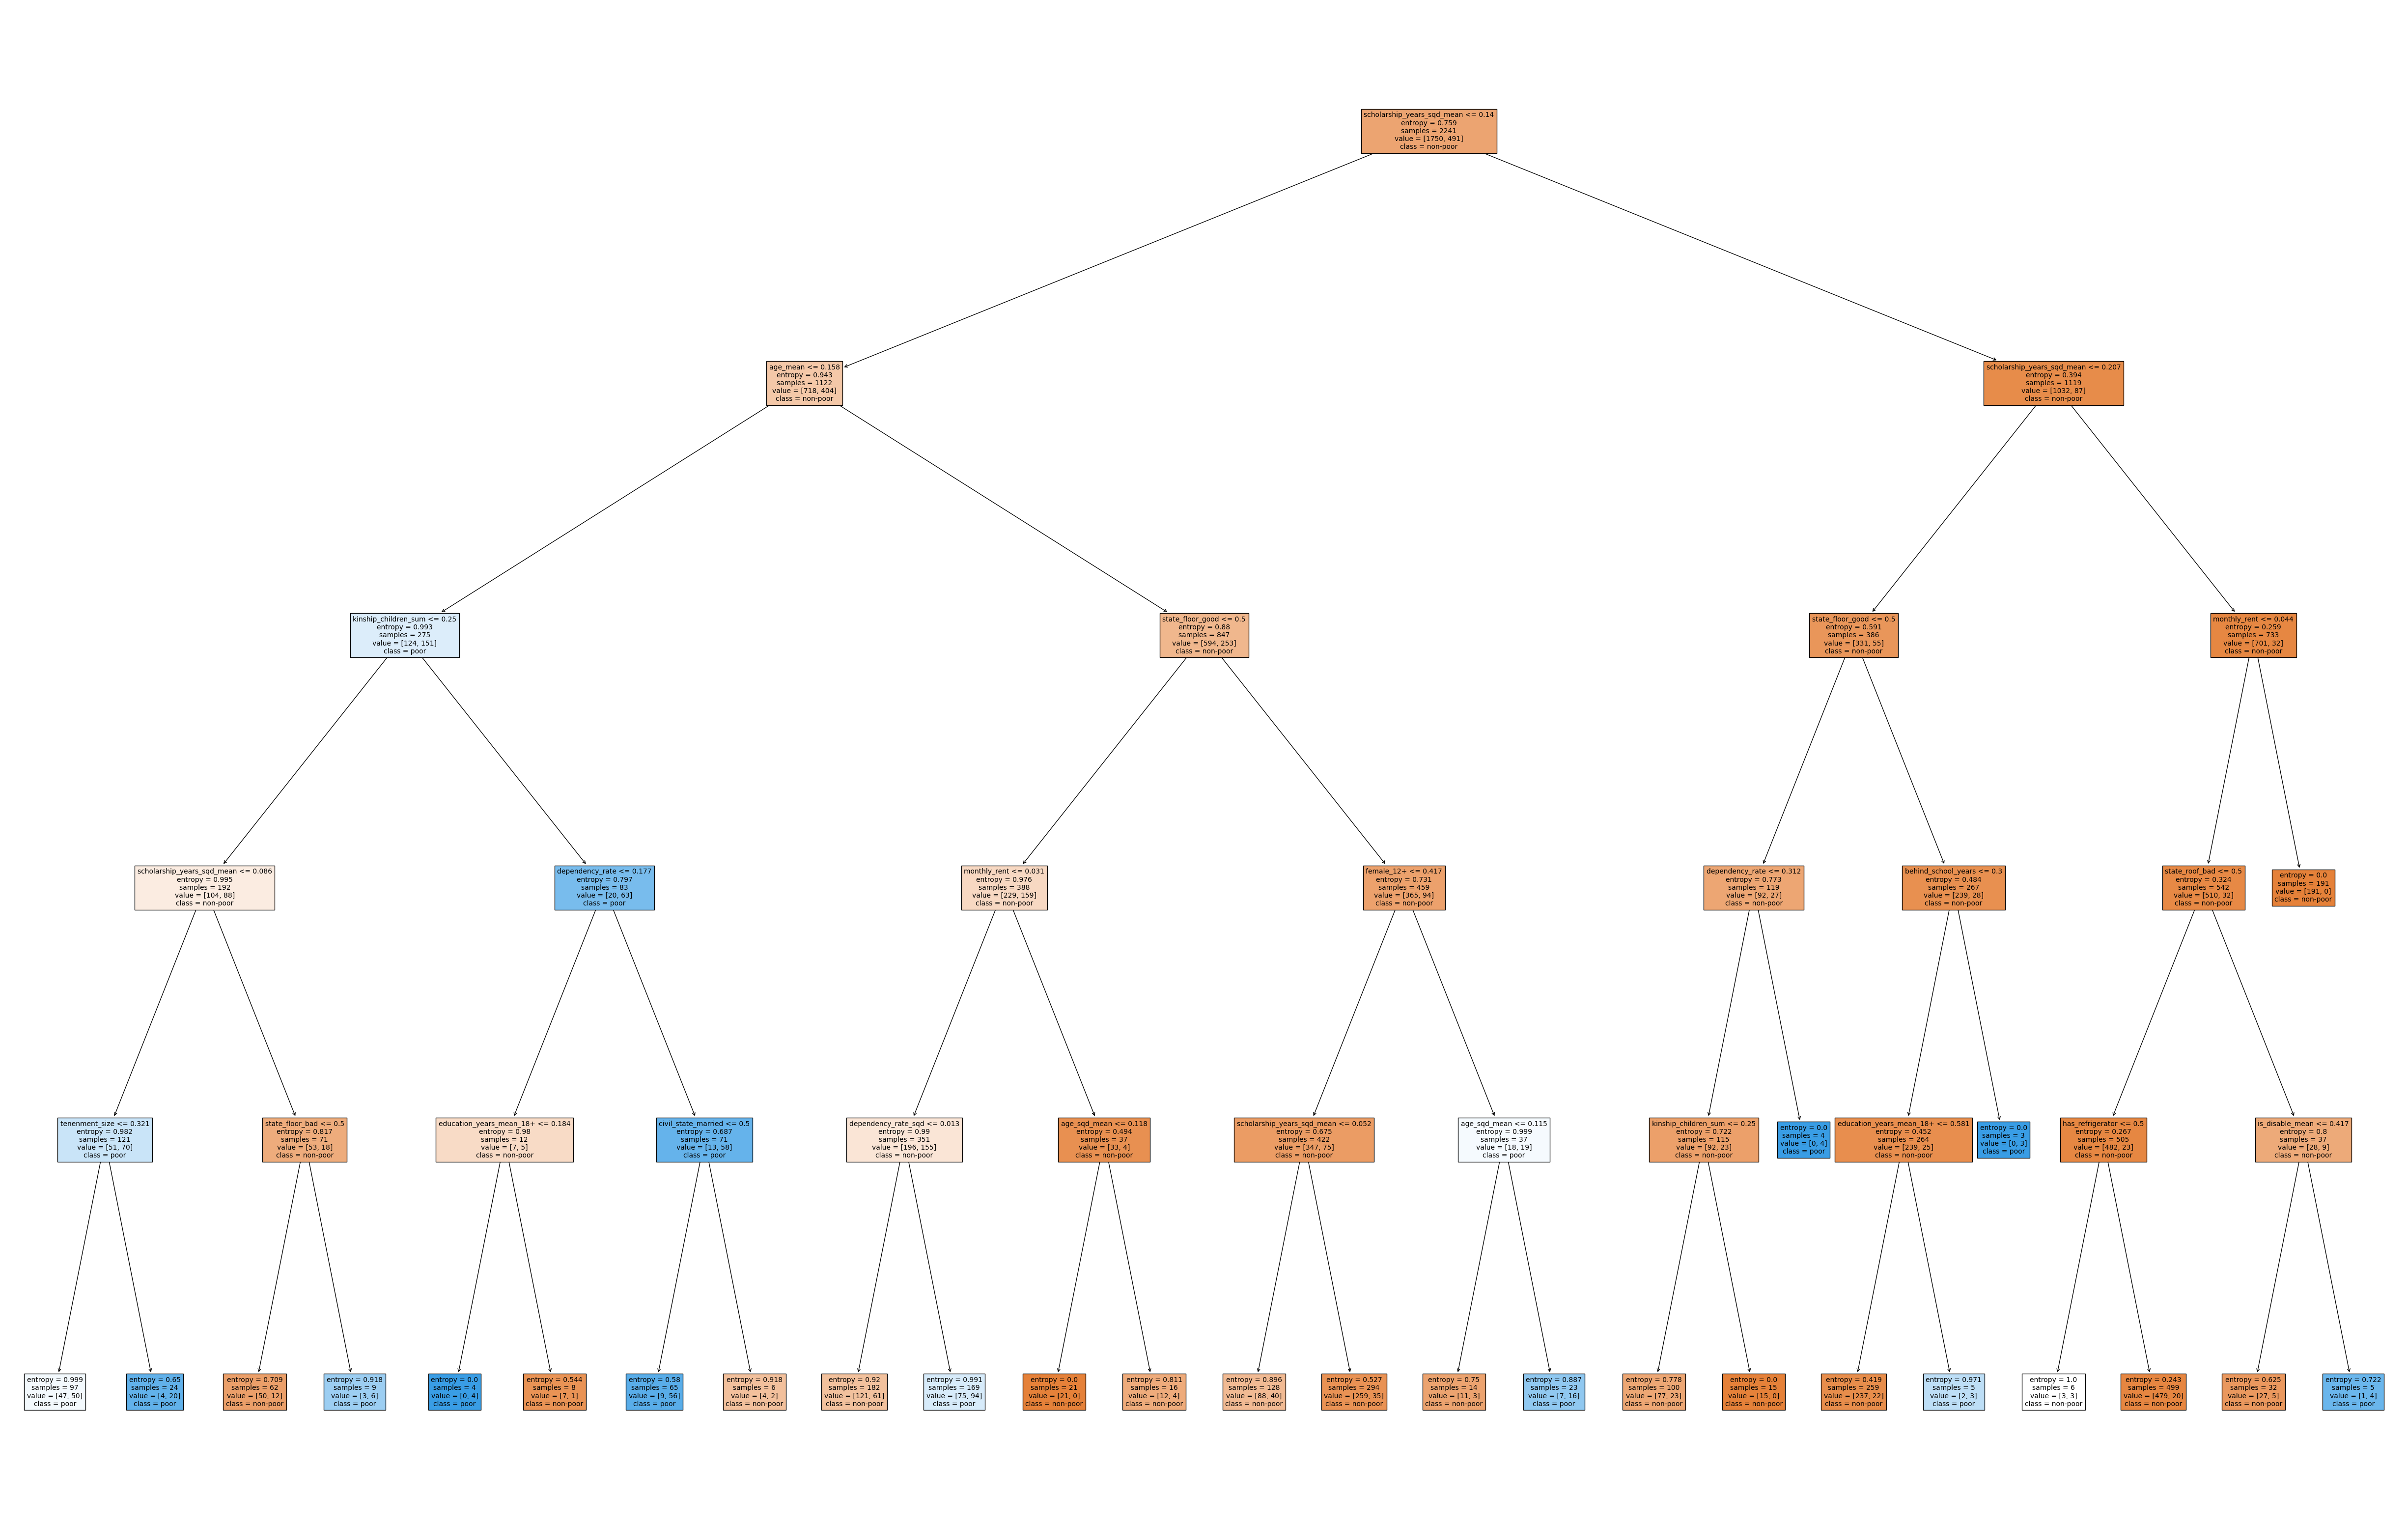

In [85]:
fig = plt.figure(figsize=(63, 40))
_ = plot_tree(tree_all,
              feature_names=X_train_all.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [86]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_all.svg', format='svg', dpi=1e5)

## Univariate - Mutual Information

### Training and score in the sample (78% - 0.01 std)

In [74]:
tree_mi = DecisionTreeClassifier(**tree_parameters)
tree_mi_scores = cross_val_score(
    tree_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_mi_scores.mean(),
    tree_mi_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [75]:
tree_mi = DecisionTreeClassifier(**tree_parameters).fit(X_train_mi, y_train_mi['y'])
y_test_predict_tree_mi = tree_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_tree_mi))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       594
           1       0.50      0.34      0.40       153

    accuracy                           0.79       747
   macro avg       0.67      0.63      0.64       747
weighted avg       0.77      0.79      0.78       747



### Tree structure

In [76]:
tree_structure(tree_mi, X_train_mi.columns.values)

The binary tree structure has 53 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, scholarship_years_sqd_mean] <= 0.16825397312641144 else to node 30.
	node=1 is a split node: go to node 2 if X[:, state_floor_good] <= 0.5 else to node 15.
		node=2 is a split node: go to node 3 if X[:, member_12-] <= 0.3571428656578064 else to node 10.
			node=3 is a split node: go to node 4 if X[:, dependency_rate_sqd] <= 0.012812500353902578 else to node 7.
				node=4 is a split node: go to node 5 if X[:, monthly_rent] <= 0.038666196167469025 else to node 6.
					node=5 is a leaf node.
					node=6 is a leaf node.
				node=7 is a split node: go to node 8 if X[:, floor_mosaic_or_ceramic] <= 0.5 else to node 9.
					node=8 is a leaf node.
					node=9 is a leaf node.
			node=10 is a split node: go to node 11 if X[:, scholarship_years_sqd_mean] <= 0.11851852014660835 else to node 14.
				node=11 is a split node: go to node 12 if X[:, tenenment_size] <= 0.250000007450

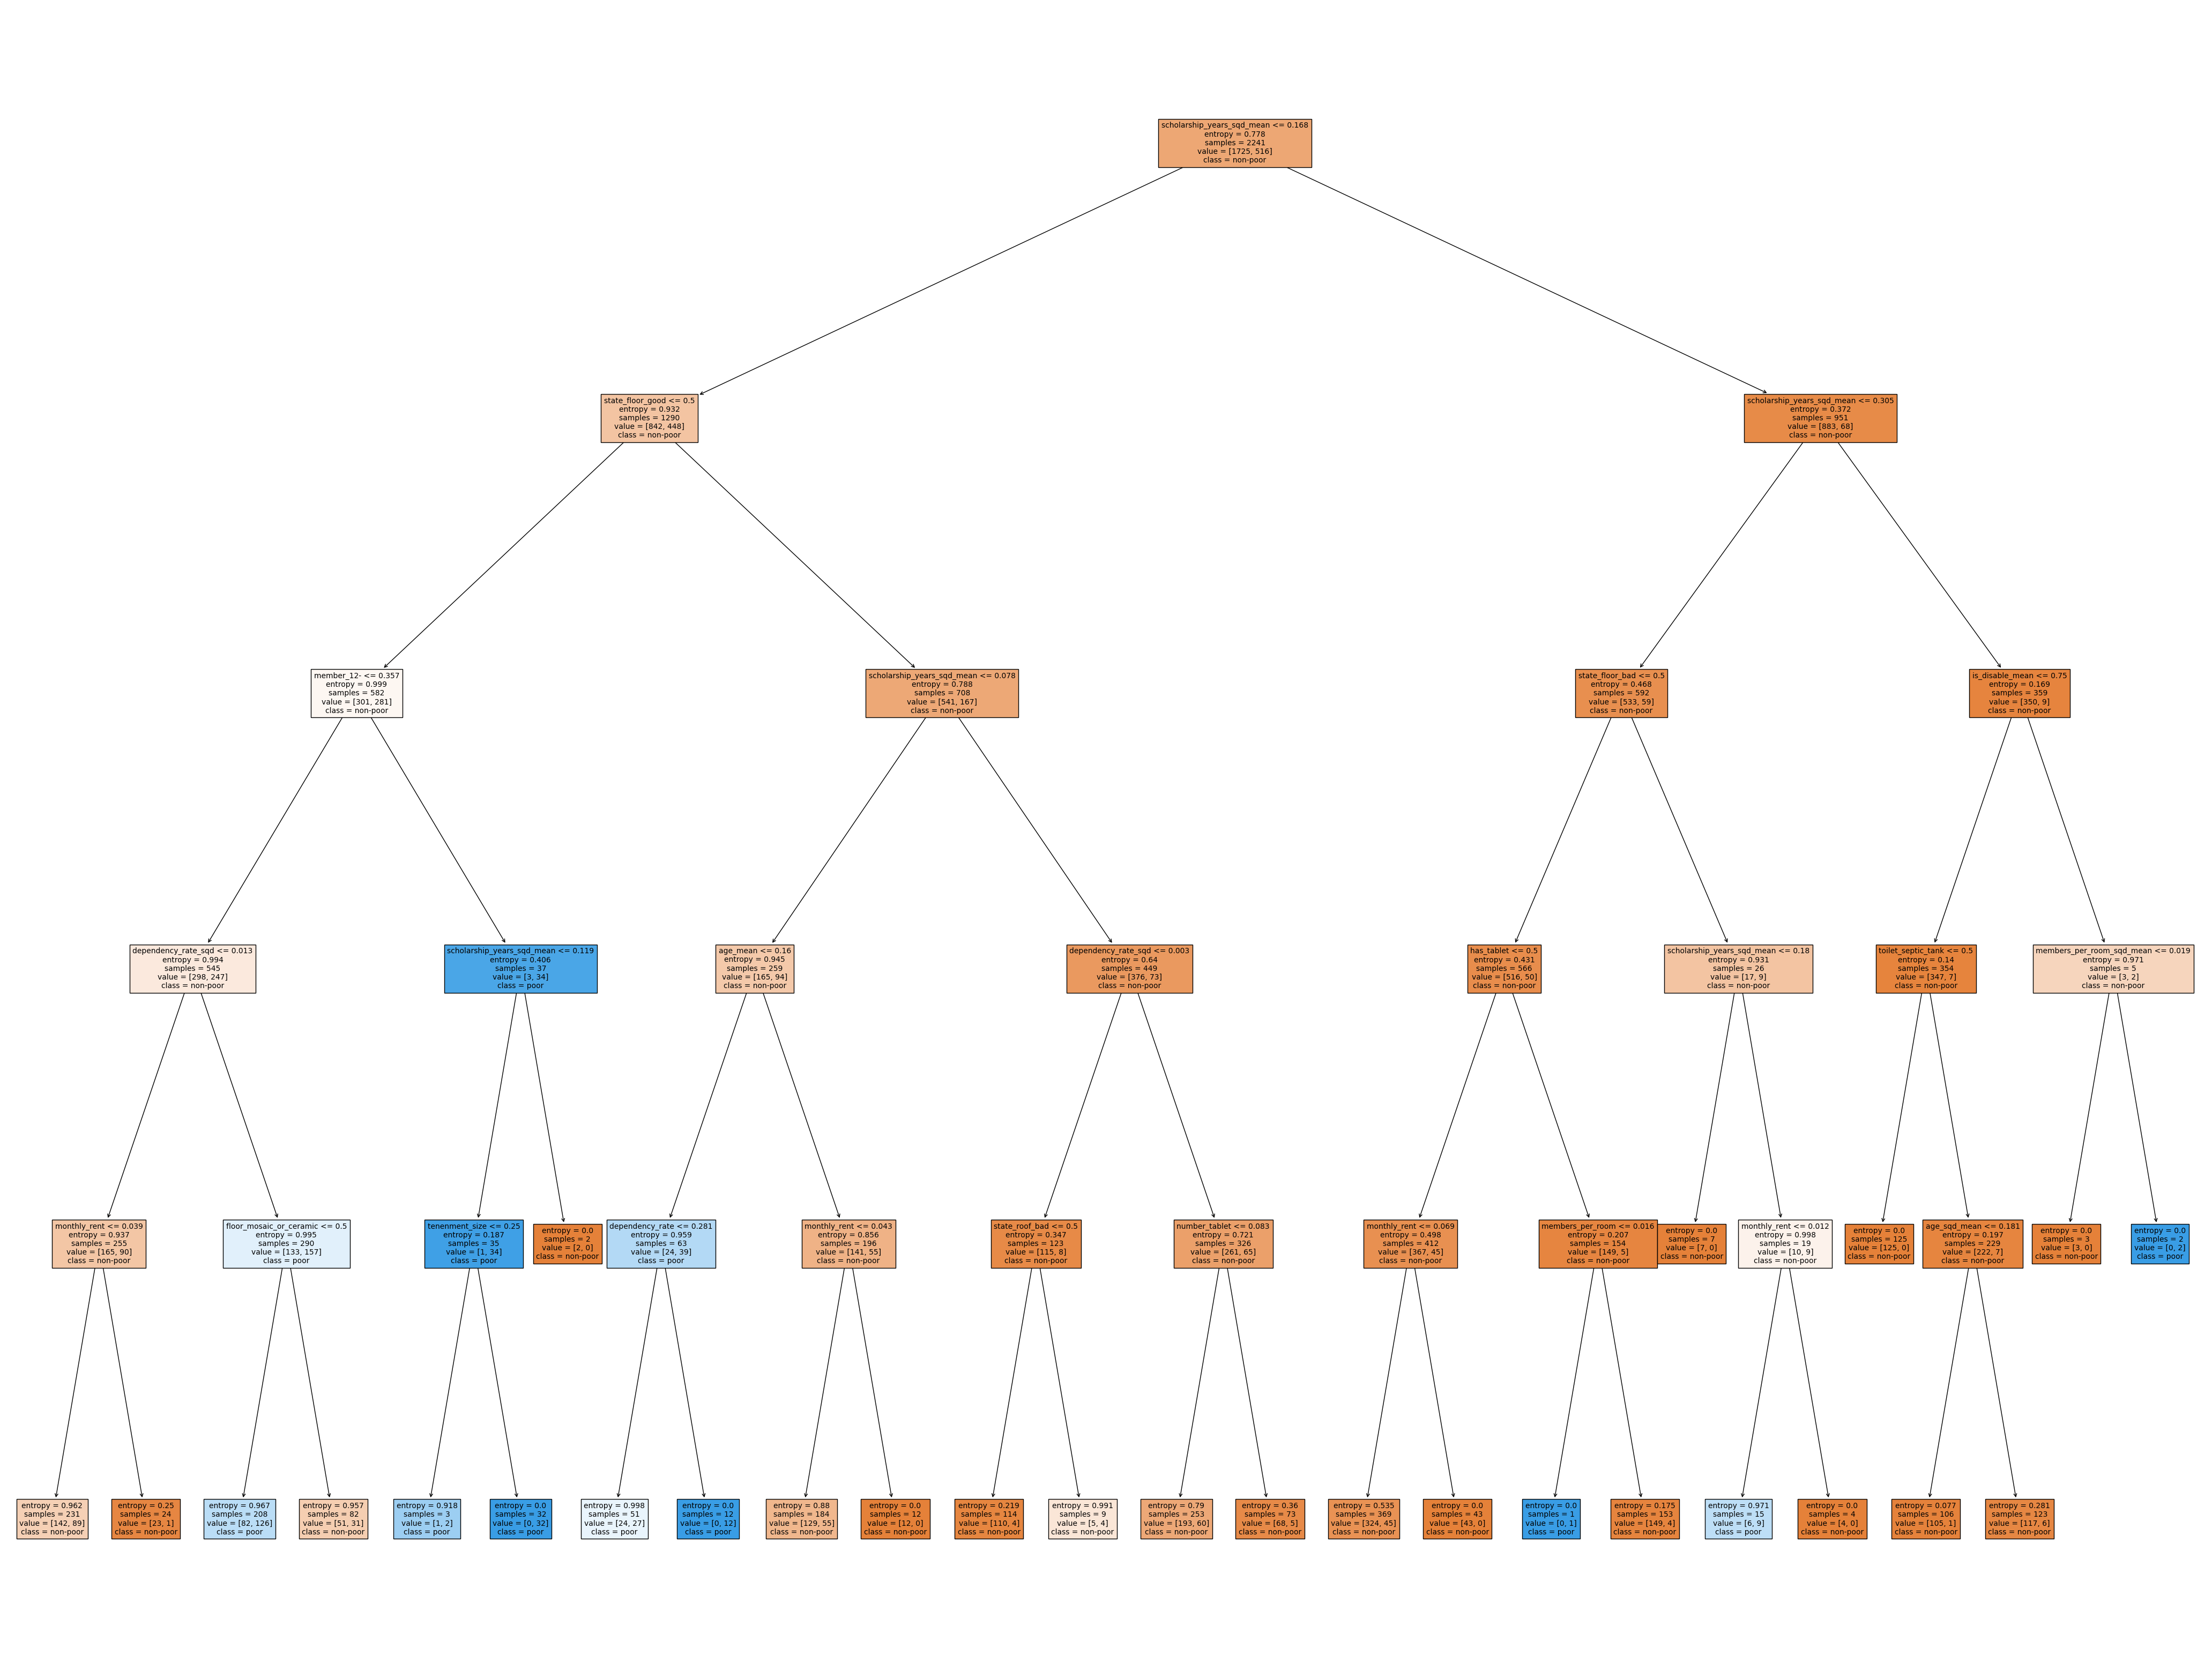

In [87]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_mi,
              feature_names=X_train_mi.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [88]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_mi.svg', format='svg', dpi=1e5)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [89]:
tree_x2 = DecisionTreeClassifier(**tree_parameters)
tree_x2_scores = cross_val_score(
    tree_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_x2_scores.mean(),
    tree_x2_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [90]:
tree_x2 = DecisionTreeClassifier(
        **tree_parameters
    ).fit(X_train_x2, y_train_x2['y'])
y_test_predict_tree_x2 = tree_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_tree_x2))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       581
           1       0.49      0.17      0.25       166

    accuracy                           0.78       747
   macro avg       0.65      0.56      0.56       747
weighted avg       0.73      0.78      0.73       747



### Tree structure

In [91]:
tree_structure(tree_x2, X_train_x2.columns.values)

The binary tree structure has 59 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, scholarship_years_sqd_mean] <= 0.1387755125761032 else to node 32.
	node=1 is a split node: go to node 2 if X[:, state_floor_good] <= 0.5 else to node 17.
		node=2 is a split node: go to node 3 if X[:, member_12-] <= 0.3571428656578064 else to node 10.
			node=3 is a split node: go to node 4 if X[:, children_19-_mean] <= 0.0555555559694767 else to node 7.
				node=4 is a split node: go to node 5 if X[:, scholarship_years_sqd_mean] <= 0.09769463166594505 else to node 6.
					node=5 is a leaf node.
					node=6 is a leaf node.
				node=7 is a split node: go to node 8 if X[:, scholarship_years_sqd_mean] <= 0.056311411783099174 else to node 9.
					node=8 is a leaf node.
					node=9 is a leaf node.
			node=10 is a split node: go to node 11 if X[:, scholarship_years_sqd_mean] <= 0.08296890184283257 else to node 14.
				node=11 is a split node: go to node 12 if X[:, wall_

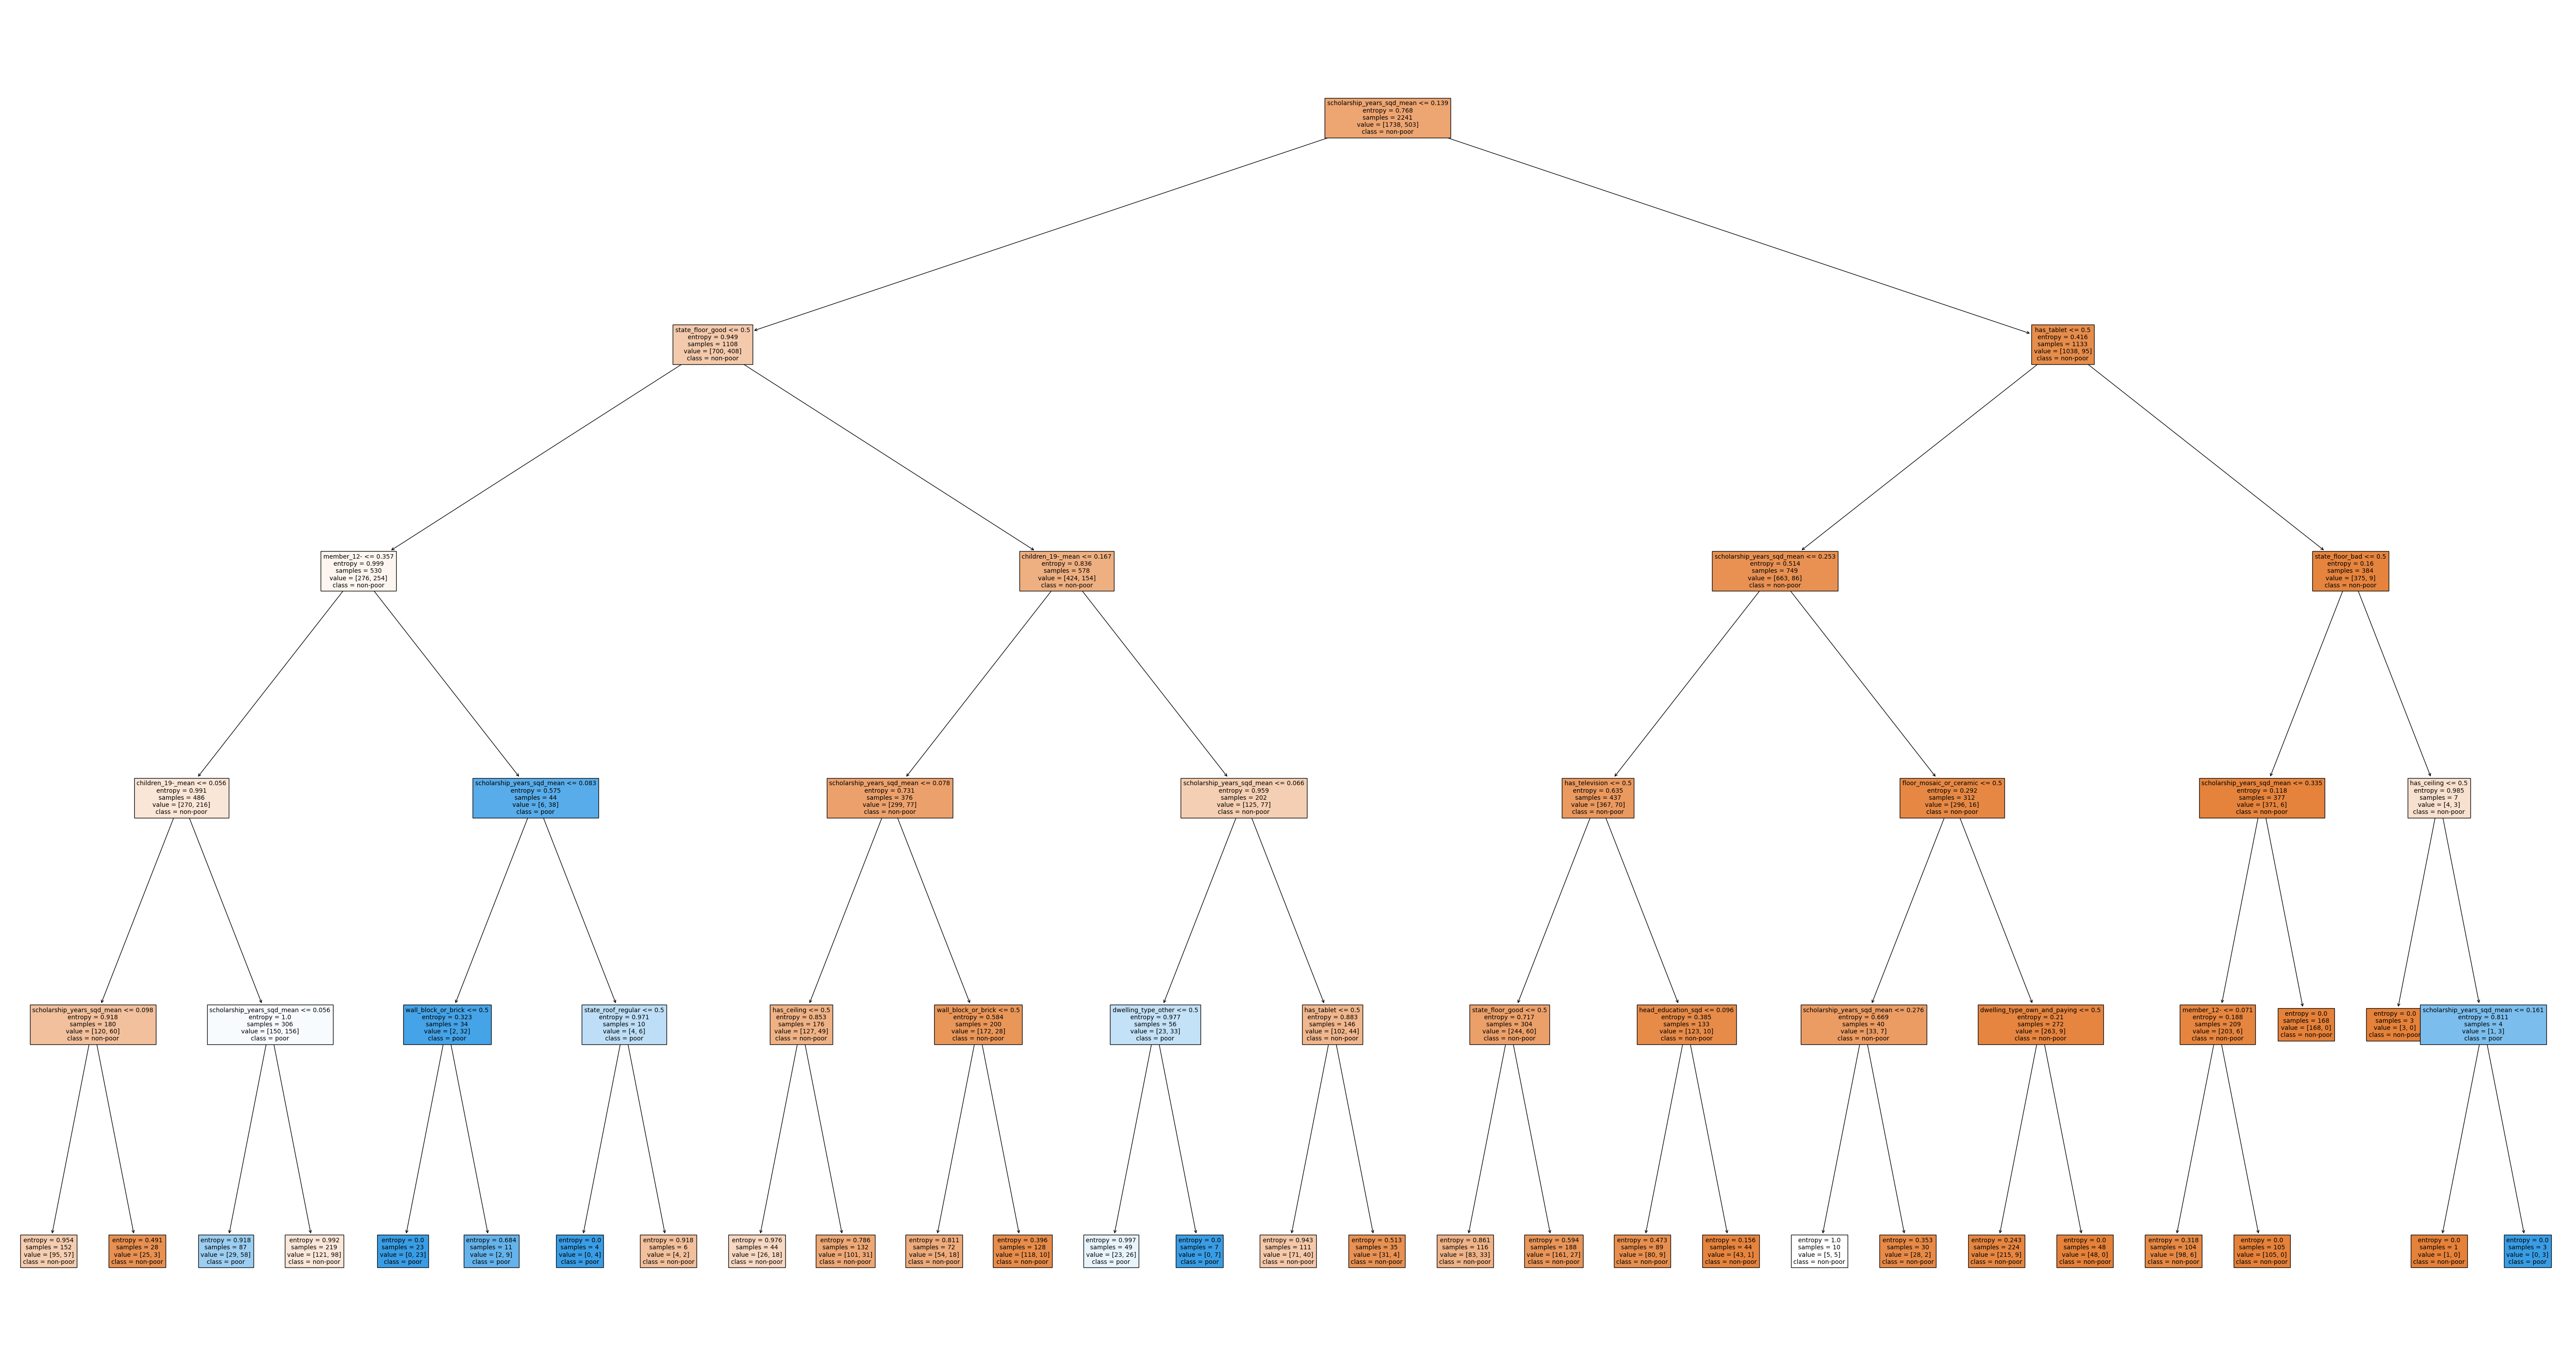

In [99]:
fig = plt.figure(figsize=(75, 40))
_ = plot_tree(tree_x2,
              feature_names=X_train_x2.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [100]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_x2.svg', format='svg', dpi=1e5)

## Univariate - ANOVA

### Training and score in the sample (78% - 0.01 std)

In [101]:
tree_anova = DecisionTreeClassifier(**tree_parameters)
tree_anova_scores = cross_val_score(
    tree_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_anova_scores.mean(),
    tree_anova_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [103]:
tree_anova = DecisionTreeClassifier(
    **tree_parameters
).fit(X_train_anova, y_train_anova['y'])
y_test_predict_tree_anova = tree_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_tree_anova))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       570
           1       0.68      0.13      0.22       177

    accuracy                           0.78       747
   macro avg       0.73      0.56      0.54       747
weighted avg       0.76      0.78      0.72       747



## Multivariate - Relief

### Training and score in the sample (81% - 0.01 std)

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters)
tree_relief_scores = cross_val_score(
    tree_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_relief_scores.mean(),
    tree_relief_scores.std())
)

0.81 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters).fit(X_train_relief, y_train_relief['y'])
y_test_predict_tree_relief = tree_relief.predict(X_test_all)

print(classification_report(y_test_relief['y'], y_test_predict_tree_relief))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       569
           1       0.62      0.29      0.39       178

    accuracy                           0.79       747
   macro avg       0.72      0.62      0.63       747
weighted avg       0.76      0.79      0.76       747



### Tree structure

In [104]:
tree_structure(tree_anova, X_train_anova.columns.values)

The binary tree structure has 47 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, scholarship_years_sqd_mean] <= 0.14947089552879333 else to node 28.
	node=1 is a split node: go to node 2 if X[:, children_19-_sqd_mean] <= 0.08024691417813301 else to node 17.
		node=2 is a split node: go to node 3 if X[:, has_ceiling] <= 0.5 else to node 10.
			node=3 is a split node: go to node 4 if X[:, scholarship_years_sqd_mean] <= 0.07815570756793022 else to node 7.
				node=4 is a split node: go to node 5 if X[:, age_mean] <= 0.06011730246245861 else to node 6.
					node=5 is a leaf node.
					node=6 is a leaf node.
				node=7 is a split node: go to node 8 if X[:, mobile_phone_number] <= 0.2500000074505806 else to node 9.
					node=8 is a leaf node.
					node=9 is a leaf node.
			node=10 is a split node: go to node 11 if X[:, state_roof_bad] <= 0.5 else to node 14.
				node=11 is a split node: go to node 12 if X[:, scholarship_years] <= 0.1666666716337204 e

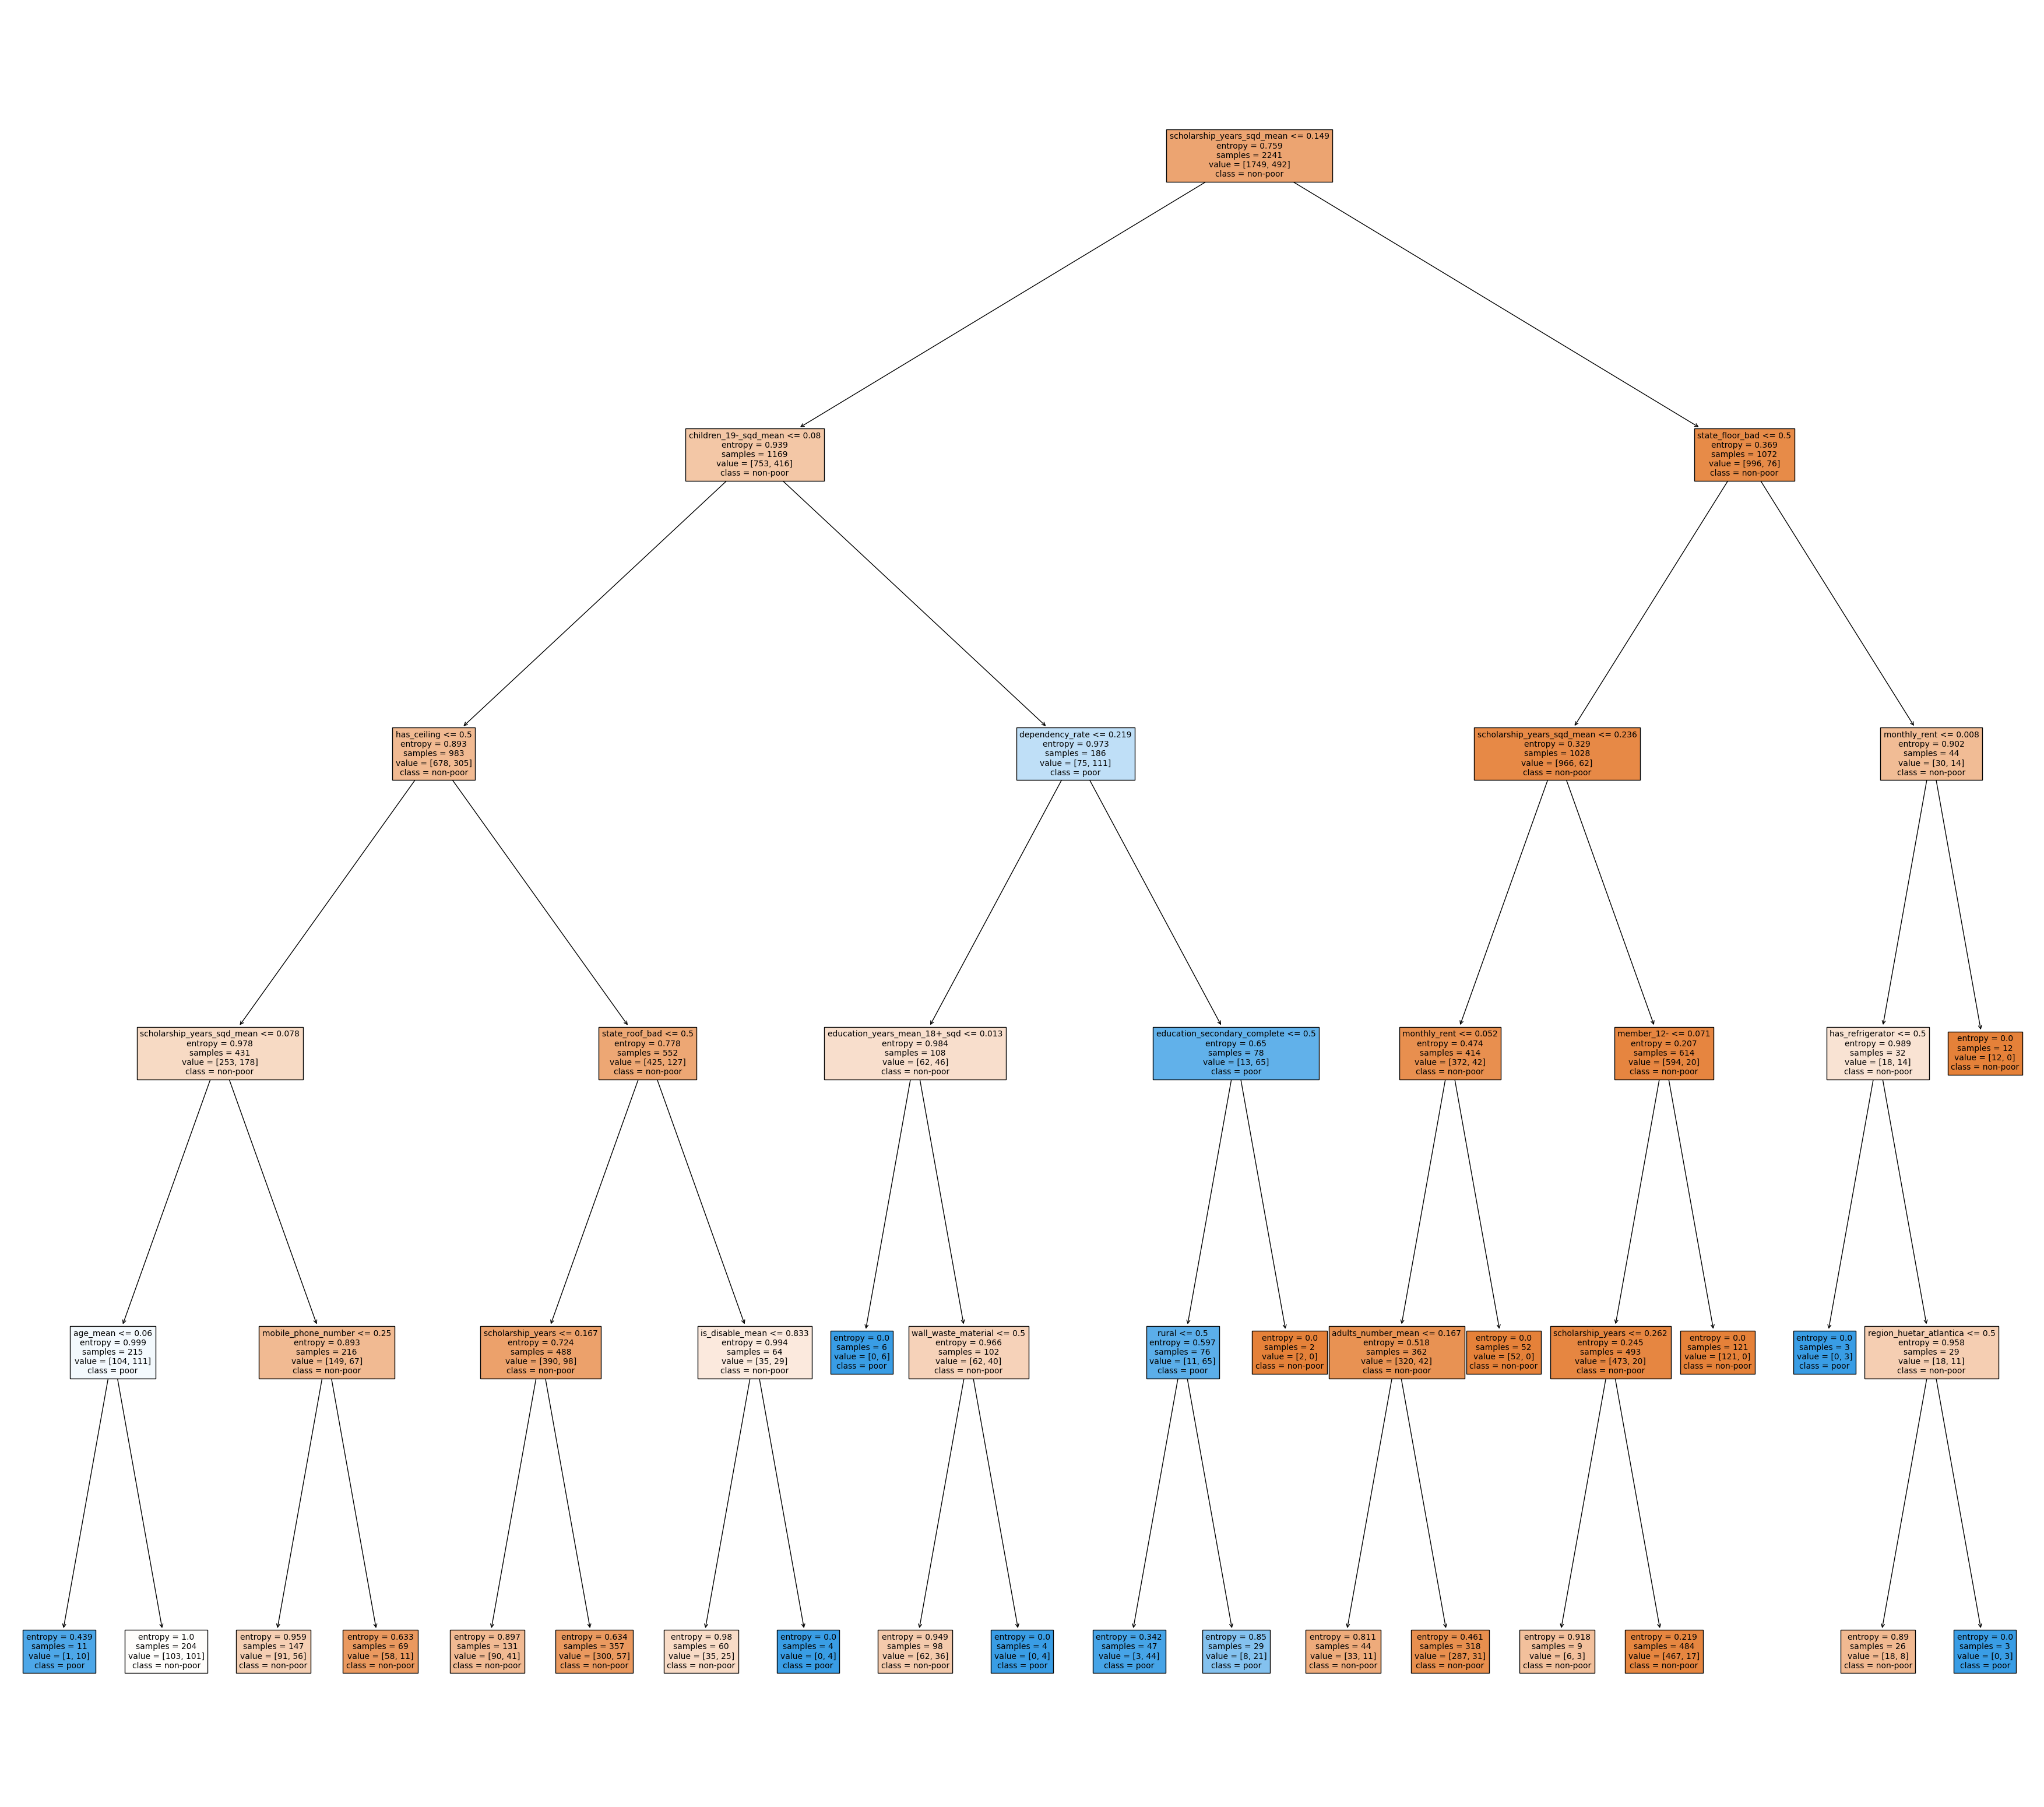

In [106]:
fig = plt.figure(figsize=(45, 40))
_ = plot_tree(tree_anova,
              feature_names=X_train_anova.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [107]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_anova.svg', format='svg', dpi=1e5)

## Wrapper

### Select features

In [ ]:
tree_wrapper = DecisionTreeClassifier()

tree_fs_wrapper = SequentialFeatureSelectorTransformer(
    tree_wrapper, n_features_to_select=75)

print('Fitting model. This may take a while...')
X_tree_wrapper = tree_fs_wrapper.fit_transform(X_all, y['y'])
print('We have a winner!')

X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)

Fitting model. This may take a while...
We have a winner!


In [ ]:
X_tree_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')

### Training and score in the sample (79% - 0.01 std)

In [109]:
X_tree_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')
X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)

In [110]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters)
tree_wrapper_scores = cross_val_score(
    tree_wrapper,
    X_train_tree_wrapper,
    y_train_tree_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_wrapper_scores.mean(),
    tree_wrapper_scores.std())
)

0.79 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [111]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters).fit(X_train_tree_wrapper, y_train_tree_wrapper['y'])
y_test_predict_tree_wrapper = tree_wrapper.predict(X_test_tree_wrapper)

print(classification_report(y_test_tree_wrapper['y'], y_test_predict_tree_wrapper))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       584
           1       0.51      0.19      0.28       163

    accuracy                           0.78       747
   macro avg       0.66      0.57      0.57       747
weighted avg       0.74      0.78      0.74       747



### Tree structure

In [112]:
tree_structure(tree_wrapper, X_train_tree_wrapper.columns.values)

The binary tree structure has 49 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, dependency_rate_sqd] <= 0.008380500599741936 else to node 22.
	node=1 is a split node: go to node 2 if X[:, state_wall_bad] <= 0.5 else to node 15.
		node=2 is a split node: go to node 3 if X[:, monthly_rent] <= 0.04369301162660122 else to node 10.
			node=3 is a split node: go to node 4 if X[:, has_computer] <= 0.5 else to node 7.
				node=4 is a split node: go to node 5 if X[:, adults_number_mean] <= 0.2777777835726738 else to node 6.
					node=5 is a leaf node.
					node=6 is a leaf node.
				node=7 is a split node: go to node 8 if X[:, dwelling_type_other] <= 0.5 else to node 9.
					node=8 is a leaf node.
					node=9 is a leaf node.
			node=10 is a split node: go to node 11 if X[:, monthly_rent] <= 0.10620371624827385 else to node 14.
				node=11 is a split node: go to node 12 if X[:, monthly_rent] <= 0.07354267686605453 else to node 13.
					node=12 is a leaf

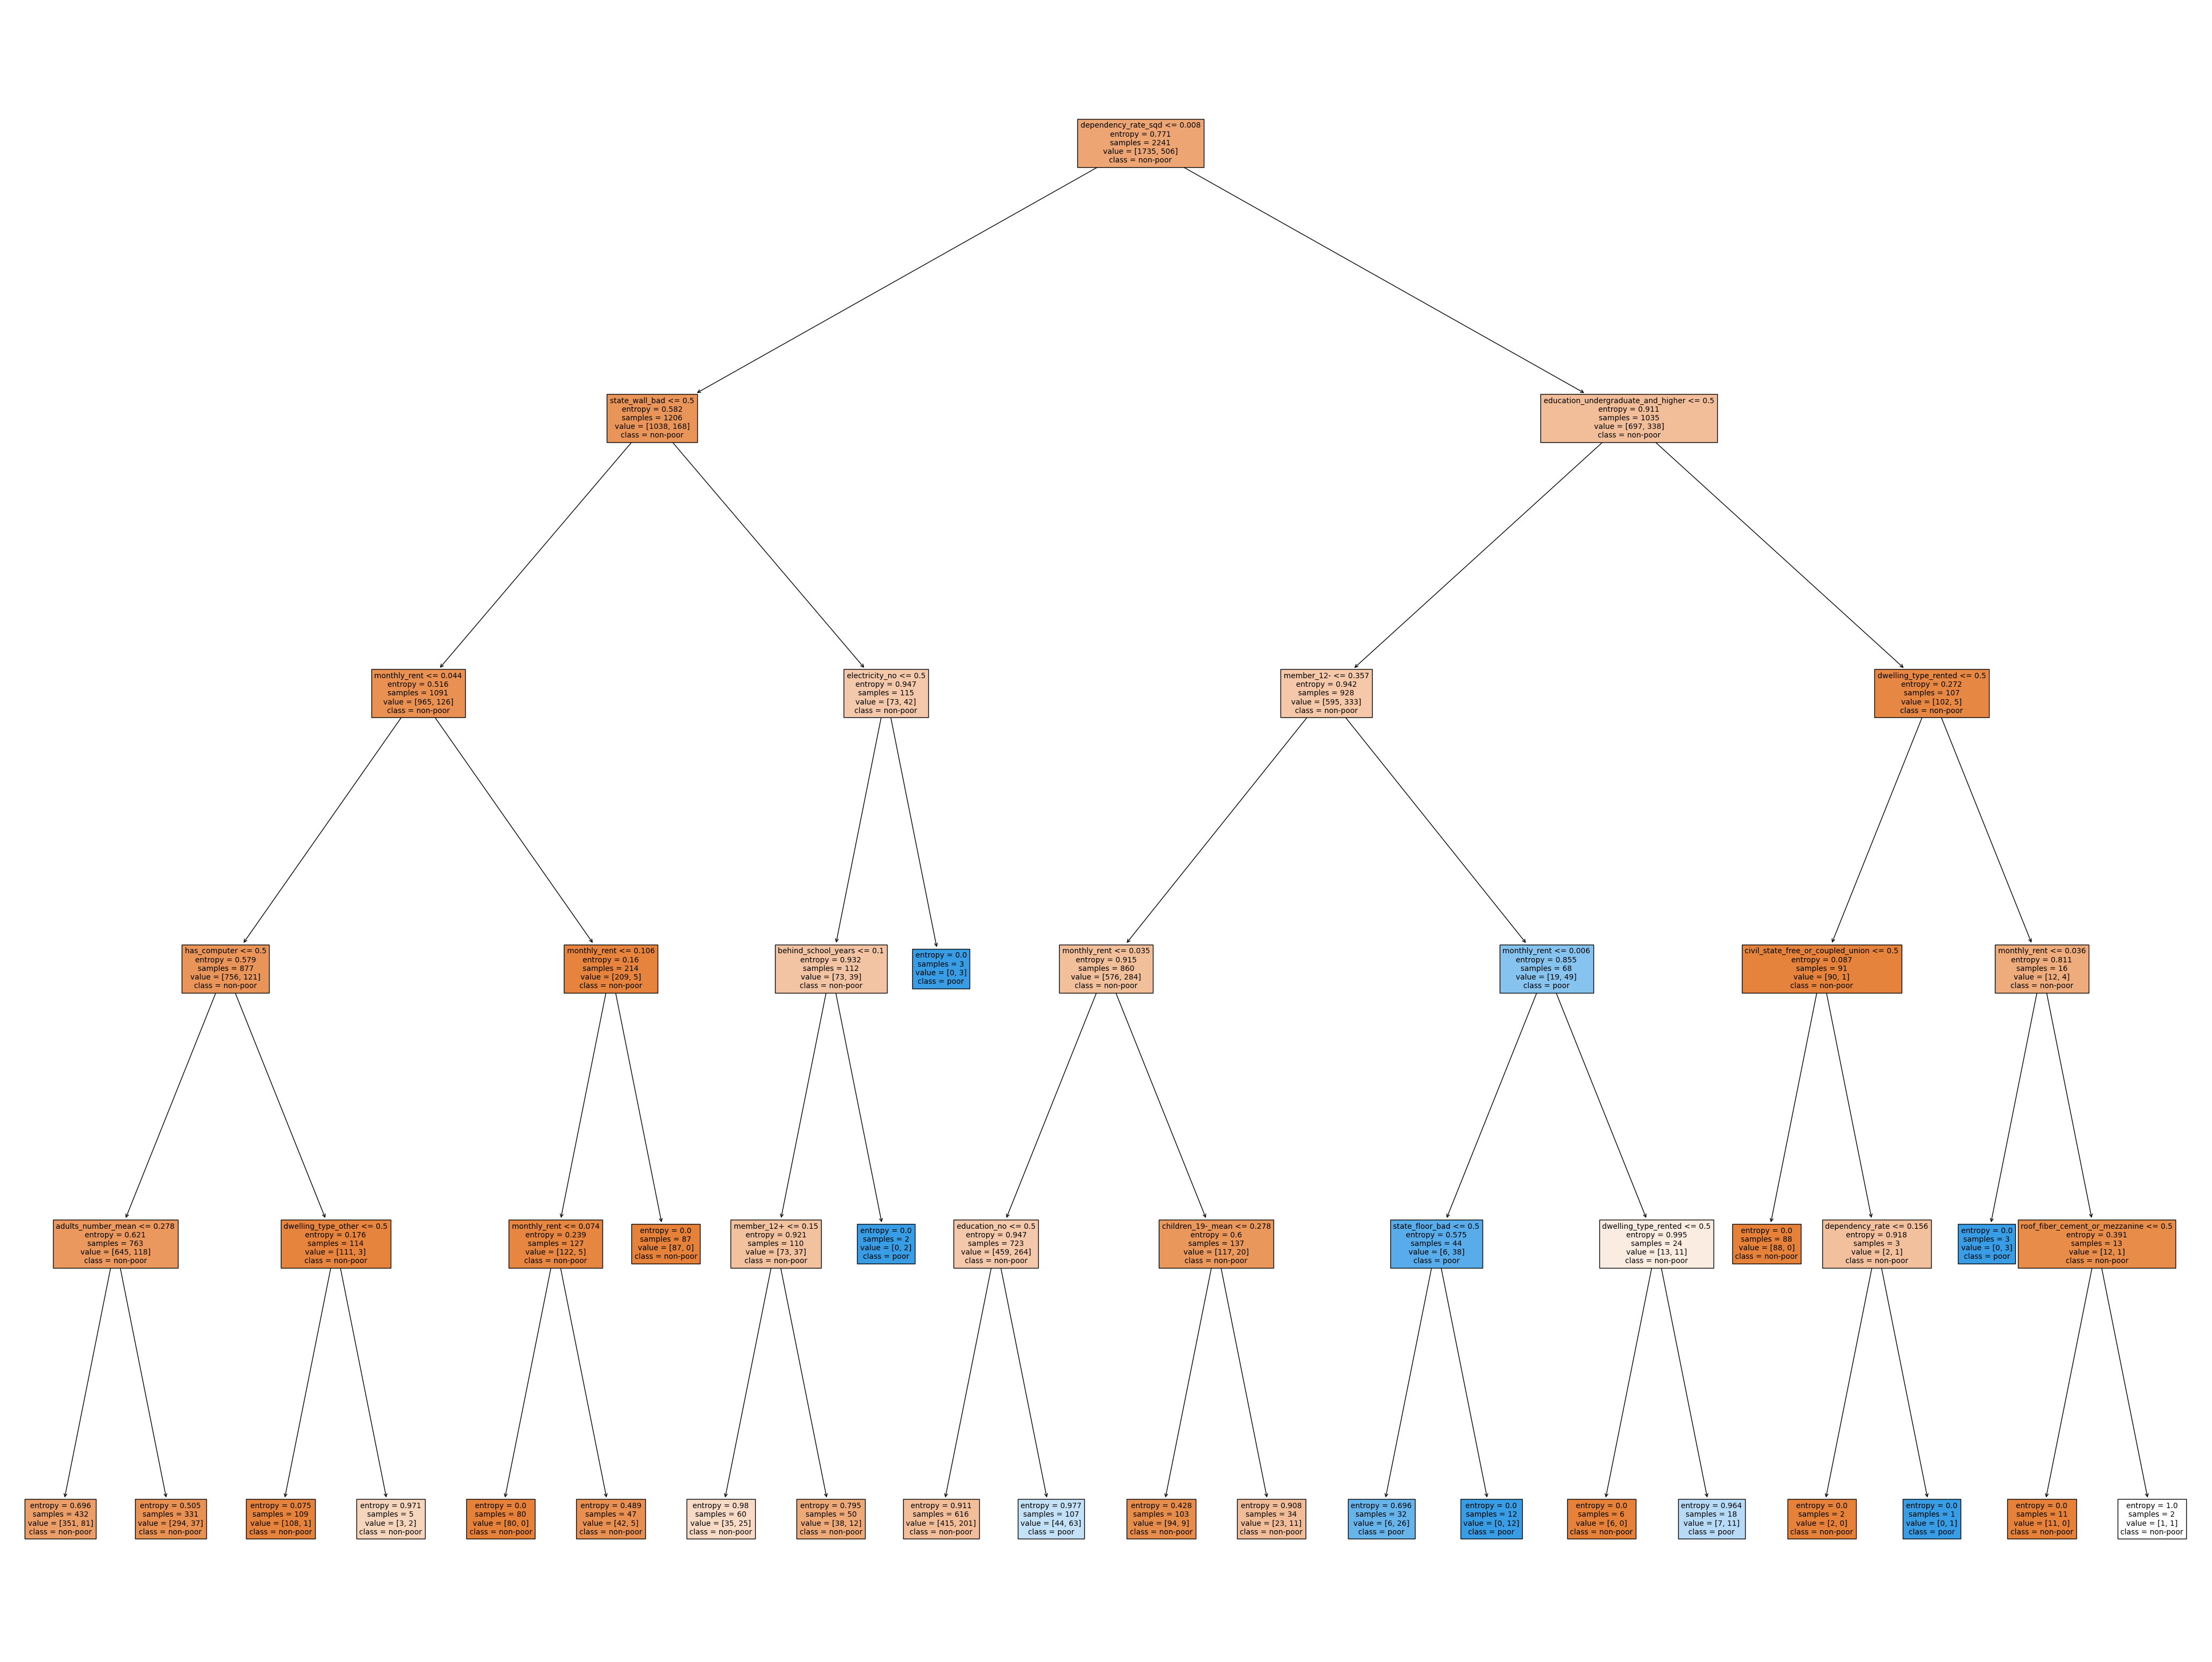

In [115]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_wrapper,
              feature_names=X_train_tree_wrapper.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [116]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_wrapper.svg', format='svg', dpi=1e5)

# Rule Induction - RIPPER

## All features

## Univariate - Mutual Information

## Univariate - $\chi^2$

## Univariate - ANOVA

## Multivariate - Relief

## Wrapper

### Select features

In [ ]:
ripper_wrapper = SVC(kernel='poly')

ripper_fs_wrapper = SequentialFeatureSelectorTransformer(
    ripper_wrapper, n_features_to_select=75)

print('Fitting model. This may take a while...')
X_ripper_wrapper = ripper_fs_wrapper.fit_transform(X_all, y['y'])
print('We have a winner!')

X_train_ripper_wrapper, X_test_ripper_wrapper, y_train_ripper_wrapper, y_test_ripper_wrapper = split_train_test(X_ripper_wrapper, y)

Fitting model. This may take a while...
We have a winner!


In [ ]:
X_ripper_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_ripper.parquet')

# K-Nearest Neighbors

## All features

## Univariate - Mutual Information

## Univariate - $\chi^2$

## Univariate - ANOVA

## Multivariate - Relief

## Wrapper

### Select features

In [ ]:
knn_wrapper = SVC(kernel='poly')

knn_fs_wrapper = SequentialFeatureSelectorTransformer(
    knn_wrapper, n_features_to_select=75)

print('Fitting model. This may take a while...')
X_knn_wrapper = knn_fs_wrapper.fit_transform(X_all, y['y'])
print('We have a winner!')

X_train_knn_wrapper, X_test_knn_wrapper, y_train_knn_wrapper, y_test_knn_wrapper = split_train_test(X_knn_wrapper, y)

Fitting model. This may take a while...
We have a winner!


In [ ]:
X_knn_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_knn.parquet')